<a href="https://colab.research.google.com/github/neihtfool/Fully-Connected-Neural-Network/blob/master/Text_classification_with_preprocessed_text.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Text classification with preprocessed text

Moview reviews

In [0]:
try:
  # %tensorflow_version only exists in Colab.
  !pip install tf-nightly
except Exception:
  pass
import tensorflow as tf

     |████████████████████████████████| 511.7MB 32kB/s 
     |████████████████████████████████| 2.9MB 55.2MB/s 
     |████████████████████████████████| 2.8MB 55.7MB/s 
     |████████████████████████████████| 460kB 61.6MB/s 
     |████████████████████████████████| 778kB 57.0MB/s 
ERROR: tensorflow 1.15.0 has requirement gast==0.2.2, but you'll have gast 0.3.3 which is incompatible.
  Found existing installation: h5py 2.8.0
    Uninstalling h5py-2.8.0:
      Successfully uninstalled h5py-2.8.0
  Found existing installation: gast 0.2.2
    Uninstalling gast-0.2.2:
      Successfully uninstalled gast-0.2.2


In [0]:
import tensorflow as tf
import tensorflow_datasets as tfds
from tensorflow import keras
import numpy as np

# Get dataset

In [0]:
(train_data, test_data), info = tfds.load('imdb_reviews/subwords8k', split=(tfds.Split.TRAIN, tfds.Split.TEST), as_supervised=True, with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUR1N0T/imdb_reviews-train.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUR1N0T/imdb_reviews-test.tfrecord


Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteUR1N0T/imdb_reviews-unsupervised.tfrecord


Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [0]:
encoder = info.features['text'].encoder
print('Vocab size: {}'.format(encoder.vocab_size))

Vocab size: 8185


## Explore the data

In [0]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:10].numpy())
  print('Label:', train_label.numpy())

encoder.decode(train_example)

Encoded text: [  62   18   41  604  927   65    3  644 7968   21]
Label: 0


"This was an absolutely terrible movie. Don't be lured in by Christopher Walken or Michael Ironside. Both are great actors, but this must simply be their worst role in history. Even their great acting could not redeem this movie's ridiculous storyline. This movie is an early nineties US propaganda piece. The most pathetic scenes were those when the Columbian rebels were making their cases for revolutions. Maria Conchita Alonso appeared phony, and her pseudo-love affair with Walken was nothing but a pathetic emotional plug in a movie that was devoid of any real meaning. I am disappointed that there are movies like this, ruining actor's like Christopher Walken's good name. I could barely sit through it."

## Data Preprocessing

In [0]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32))

test_batches = (
    test_data
    .padded_batch(32))

In [0]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape", example_batch.shape)
  print("label shape:", label_batch.shape)

Batch shape (32, 680)
label shape: (32,)
Batch shape (32, 1497)
label shape: (32,)


## Build the model

In [0]:
model = keras.Sequential([
                          keras.layers.Embedding(encoder.vocab_size, 16),
                          keras.layers.GlobalAveragePooling1D(),
                          keras.layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [0]:
model.compile(optimizer="adam", loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [0]:
history = model.fit(train_batches,
                    epochs=10,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/10
782/782 [==============================] - 11s 14ms/step - loss: 0.6816 - accuracy: 0.5006 - val_loss: 0.6619 - val_accuracy: 0.5052
Epoch 2/10
782/782 [==============================] - 7s 9ms/step - loss: 0.6174 - accuracy: 0.5585 - val_loss: 0.5917 - val_accuracy: 0.5896
Epoch 3/10
782/782 [==============================] - 8s 10ms/step - loss: 0.5385 - accuracy: 0.6699 - val_loss: 0.5296 - val_accuracy: 0.7250
Epoch 4/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4712 - accuracy: 0.7548 - val_loss: 0.4800 - val_accuracy: 0.7688
Epoch 5/10
782/782 [==============================] - 8s 10ms/step - loss: 0.4205 - accuracy: 0.8016 - val_loss: 0.4430 - val_accuracy: 0.8135
Epoch 6/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3811 - accuracy: 0.8332 - val_loss: 0.4149 - val_accuracy: 0.8156
Epoch 7/10
782/782 [==============================] - 8s 10ms/step - loss: 0.3464 - accuracy: 0.8558 - val_loss: 0.3957 - val_accuracy: 0.8323

## Model Evaluation

In [0]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("Accuracy: ", accuracy)

    782/Unknown - 5s 7ms/step - loss: 0.3318 - accuracy: 0.8540Loss:  0.33177794161659985
Accuracy:  0.85396


## Create a graph of accuracy and loos over time

In [0]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

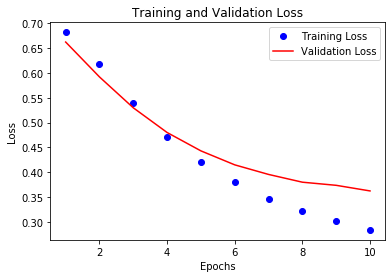

In [0]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

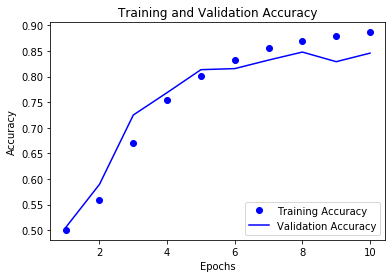

In [0]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()